In [1]:
import numpy as np
import matplotlib.pyplot as plt

from initial_conditions import Domain, Heaviside, LinearRamp, SmoothRamp, Sigmoid, CkRamp
from basis_functions import SVD, Trigonometric, Greedy, LNA, LPF

In [2]:
m, n, r = 500, 2000, 100
x = Domain([0, 1], m)
mu = Domain([0, 4], n)

epsilon = .25
dx = x.delta_x
dt = mu.delta_x
c = 1.0

In [14]:
u_hs = Heaviside()
u_lr = LinearRamp(epsilon)
u_sr = SmoothRamp(epsilon)
u_C1 = CkRamp(epsilon, 1)
u_C2 = CkRamp(epsilon, 2)
u_C3 = CkRamp(epsilon, 3)
u_C4 = CkRamp(epsilon, 4)
u_C5 = CkRamp(epsilon, 5)
u_sg = Sigmoid(1/epsilon)

In [21]:
def apply_neumann(u):
    u[0], u[-1] = u[2], u[-3]
    return u

def apply_dirichtlet(u):
    u[0], u[-1] = 0.0, 0.0
    return u

apply_bc = apply_neumann


def get_SS(ue, x, mu):
    dx = x.delta_x
    dt = mu.delta_x

    u_n = np.r_[0.0, ue(x(), .5+dt), ue(x(), .5-dt)[::-1], -ue(x(), .5+dt), -ue(x(), .5-dt)[::-1], 0.0]
    u_1 = np.r_[0.0, ue(x(), .5), ue(x(), .5)[::-1], -ue(x(), .5), -ue(x(), .5)[::-1], 0.0]

    u_n = apply_bc(u_n)
    u_1 = apply_bc(u_1)
    u_xx = u_n.copy()

    X = np.zeros((4*m, n))
    X[:, 0] = u_1[1:-1].copy()
    X[:, 1] = u_n[1:-1].copy()
    
    for j in range(2,n):
        u_xx[1:-1] = (u_n[2:]-2*u_n[1:-1]+u_n[:-2])/dx**2
        u_np1 = c*u_xx*dt**2 + 2*u_n - u_1
        u_np1 = apply_bc(u_np1)
        u_1 = u_n.copy()
        u_n = u_np1.copy()
        X[:, j] = u_np1[1:-1].copy()
    return X


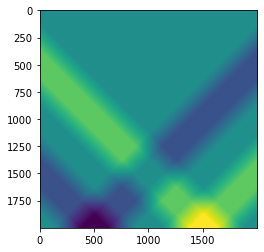

In [22]:
X = get_SS(u_lr, x, mu)
plt.imshow(X, interpolation="nearest")

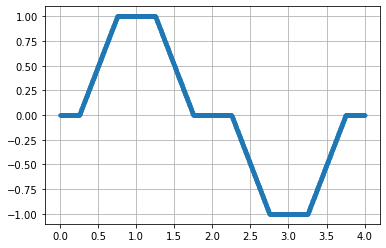

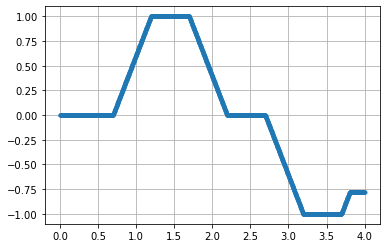

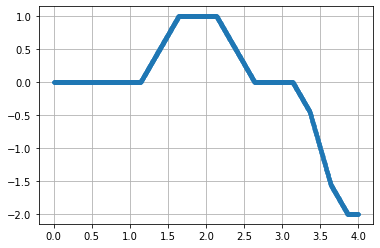

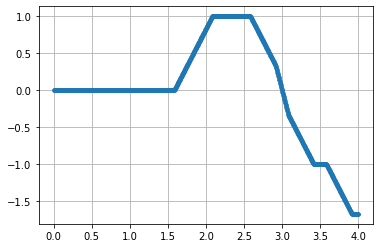

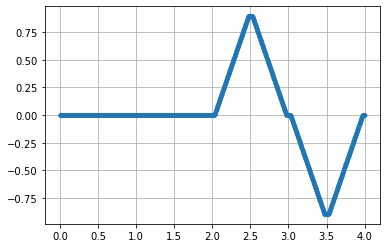

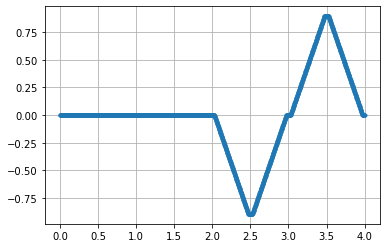

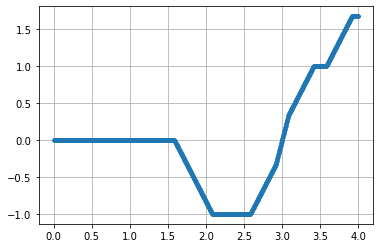

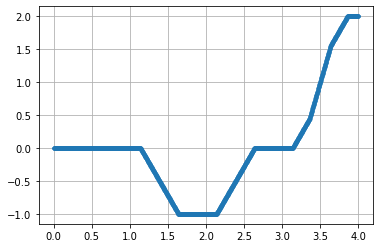

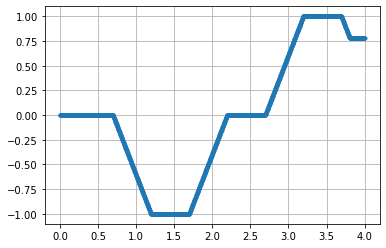

IndexError: index 2000 is out of bounds for axis 1 with size 2000

In [23]:
xxxx = np.r_[x(), x()+1, x()+2, x()+3]
for j in np.linspace(0, n, 10, dtype=np.int32):
    u_n = X[:, j]
    plt.plot(xxxx, u_n, marker=".")
    plt.grid()
    plt.show()

In [7]:
svd_basis = SVD(X)
U = svd_basis.U
S = svd_basis.S
VT = svd_basis.VT

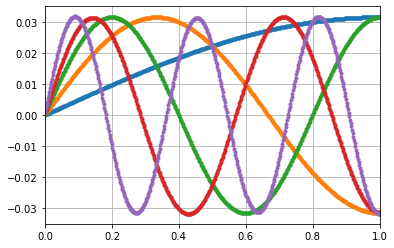

In [8]:
for j in range(5):
    plt.plot(xxxx, U[:, j], marker=".")
    plt.grid()
plt.xlim([0, 1])
plt.show()

No handles with labels found to put in legend.


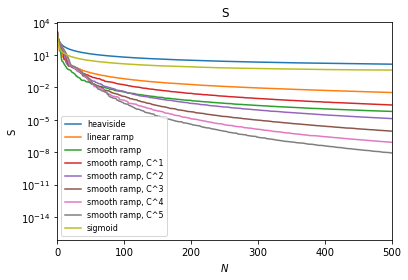

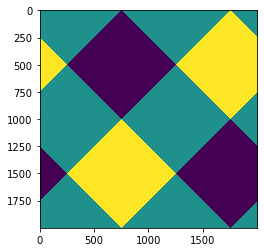

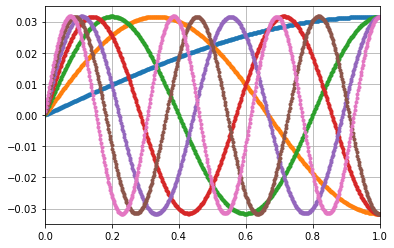

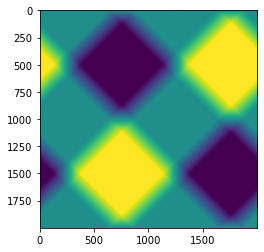

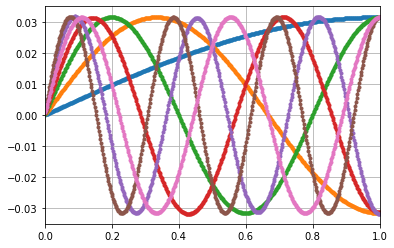

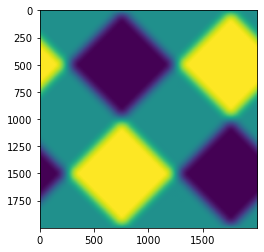

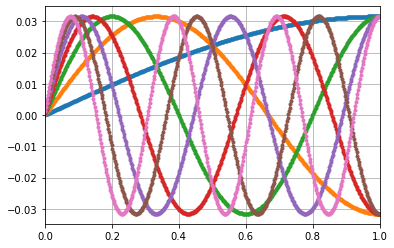

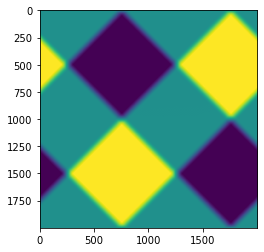

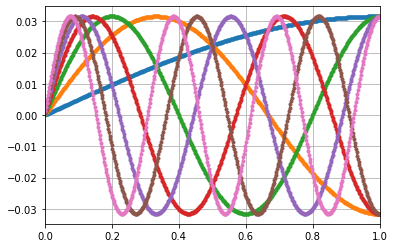

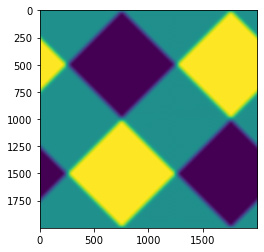

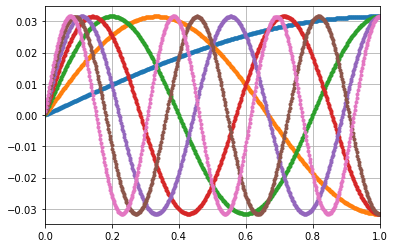

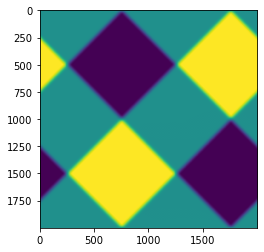

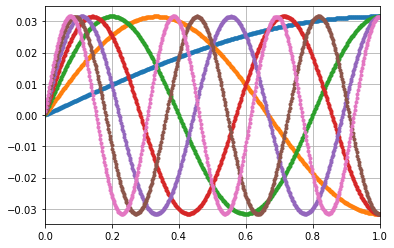

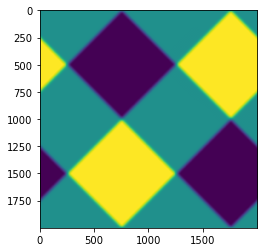

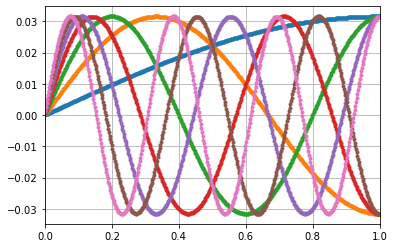

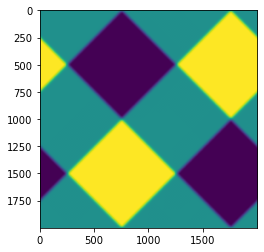

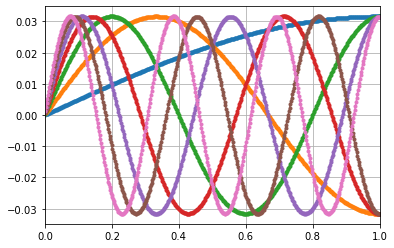

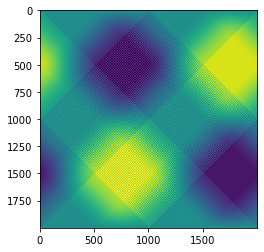

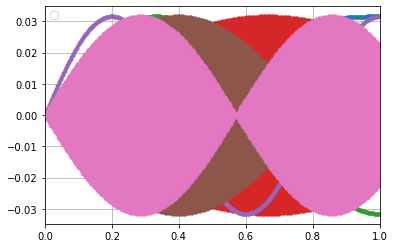

In [13]:
fig, ax_S = plt.subplots()

for u in [u_hs, u_lr, u_sr, u_C1, u_C2, u_C3, u_C4, u_C5, u_sg]:
    X = get_SS(u, x, mu)
    svd_basis = SVD(X)

    fig, ax = plt.subplots()
    ax.imshow(X, interpolation="nearest")
    
    fig, ax2 = plt.subplots()
    for j in range(7):
        ax2.plot(xxxx, svd_basis.U[:, j], marker=".")
    plt.grid()
    plt.xlim([0, 1])
    
    ax_S.plot(svd_basis.S, label=u.name)
ax_S.set_yscale('log')
ax_S.set_title("S")
ax_S.legend(prop={'size': 8})
ax_S.set_xlabel(r'$N$')
ax_S.set_ylabel('S')
ax_S.set_xlim([0, m])
plt.legend()
plt.show()